In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8.4
fig_height = 5.44
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'RDpcR2l0SHViXFRETS1DQUwtTW9kZS1DaG9pY2U='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\importlib\\_bootstrap.py": 1741044192.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\importlib\\_bootstrap_external.py": 1741044192.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\zipimport.py": 1741044197.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\codecs.py": 1741044191.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\encodings\\aliases.py": 1741044191.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\encodings\\__init__.py": 1741044191.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\encodings\\utf_8.py": 1741044191.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\encodings\\cp1252.py": 1741044191.0, "C:\\Users\\Pukar.Bhandari\\AppData\\Local\\miniconda3\\envs\\wfrc\\Lib\\abc.py": 1741044191.0, "C:\\Users\\Pukar.Bhand

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import geopandas as gpd
from pathlib import Path
import glob
from dbfread import DBF
import re
import os
import requests
import io

import openmatrix as omx
import subprocess

In [3]:
PROJECT_CRS = "EPSG:3566"  # NAD83 / Utah North (ftUS)

In [4]:
def fetch_github(
    url: str,
    mode: str = "private",
    token_env_var: str = "GITHUB_TOKEN"
) -> requests.Response:
    """
    Fetch content from GitHub repositories.

    Args:
        url: GitHub raw URL (e.g., https://raw.githubusercontent.com/...)
        mode: "public" for public repos, "private" for private repos requiring authentication
        token_env_var: Name of environment variable containing GitHub token (default: GITHUB_TOKEN)

    Returns:
        requests.Response object

    Raises:
        ValueError: If token is missing for private mode or invalid mode
        requests.HTTPError: If request fails
    """
    # Validate mode
    if mode not in ["public", "private"]:
        raise ValueError(f"mode must be 'public' or 'private', got '{mode}'")

    if mode == "public":
        response = requests.get(url, timeout=30)
    else:
        token = os.getenv(token_env_var)
        if not token:
            raise ValueError(
                f"GitHub token not found in environment variable '{token_env_var}'. "
                f"Check your .env file has: {token_env_var}=your_token_here"
            )

        headers = {
            'Authorization': f'token {token}',
            'Accept': 'application/vnd.github.v3.raw'
        }
        response = requests.get(url, headers=headers, timeout=30)

    response.raise_for_status()
    return response

In [5]:
gdf_taz_v10 = gpd.read_file(
    r"_data/TAZ/WFv910_TAZ.shp"
).to_crs(PROJECT_CRS)

In [6]:
#| eval: false
gdf_taz_v10.explore()

In [7]:
# Read Linked UTA On-Board Survey Data directly from GitHub repo
response = fetch_github(
    "https://raw.githubusercontent.com/WFRCAnalytics/DATA-OBS-Prep-For-TDM/refs/heads/main/_output/UTA_OBS_2024_Linked_FactorAdjusted.csv",
    mode = "private"
)

df_obs_linked = pd.read_csv(io.StringIO(response.text))

# Filter only the Weekday trips
df_obs_linked = df_obs_linked[df_obs_linked["DATE_TYPE"] == "Weekday"]
df_obs_linked

C:\Users\Pukar.Bhandari\AppData\Local\Temp\ipykernel_25656\3049727246.py:7: DtypeWarning:

Columns (8,24,32,37,54,132,137,174,287) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,DATE_COMPLETED,DATE_TYPE,ROUTE_DIRECTION_Code,ROUTE_DIRECTION,ROUTE_DIRECTION_Other,HOME_ADDRESS_CITY,HOME_ADDRESS_STATE,HOME_ADDRESS_ZIP,HOME_ADDRESS_LAT,...,a_Stop_lat,a_Stop_lon,p_Stop_N,a_Stop_N,access_dist,access_time,egress_dist,egress_time,Adj_Factor,trip_weight
0,5948,2024-02-27,Weekday,UTA_1_2_00,2 200 SOUTH - TO U HOSPITAL,NaN,Clearfield,UT,84015,41.119565,...,40.769221,-111.898663,27702.0,25493.0,0.37,8.79,0.68,16.27,1.195057,7.988529
1,6067,2024-02-27,Weekday,UTA_1_47_00,47 4700 SOUTH - TO W VALLEY CTL,NaN,West Valley City,UT,84119,40.689590,...,40.660941,-111.899443,23195.0,23685.0,0.56,13.53,0.24,5.70,1.407280,4.420834
3,6073,2024-02-28,Weekday,UTA_1_750_01,FRONTRUNNER 750 - SOUTHBOUND,NaN,Ogden,UT,84401,41.236749,...,40.659758,-111.896432,10042.0,10016.0,4.17,8.22,1.37,3.29,1.192511,5.413118
4,6077,2024-02-28,Weekday,UTA_1_47_00,47 4700 SOUTH - TO W VALLEY CTL,NaN,West Valley City,UT,84119,40.669687,...,40.681907,-112.024041,22922.0,22421.0,0.25,6.00,0.49,11.88,1.407280,10.487378
5,6078,2024-02-28,Weekday,UTA_1_220_00,220 HIGHLAND DRIVE / 1300 EAST - TO SANDY,NaN,Salt Lake City,UT,84101,40.765122,...,40.687097,-111.866122,15115.0,24517.0,0.27,6.51,0.19,4.55,1.407280,3.287619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13790,30339,2024-04-26,Weekday,UTA_1_704_01,TRAX GREEN LINE 704 - TO AIRPORT,NaN,Salt Lake City,UT,84116,40.772420,...,40.771502,-111.914486,15101.0,15122.0,0.31,7.53,0.17,4.07,1.405314,8.528545
13791,30340,2024-04-26,Weekday,UTA_1_704_00,TRAX GREEN LINE 704 - TO WEST VALLEY,NaN,Salt Lake City,UT,84116,40.771361,...,40.750058,-111.896818,15122.0,15109.0,0.46,11.00,1.21,29.10,1.405314,16.406476
13792,30341,2024-04-26,Weekday,UTA_1_704_00,TRAX GREEN LINE 704 - TO WEST VALLEY,NaN,Salt Lake City,UT,84116,40.773232,...,40.725345,-111.877499,15122.0,24968.0,0.17,4.07,0.86,20.68,1.405314,8.203238
13793,1000002,2024-02-29,Weekday,UTA_1_701_00,TRAX BLUE LINE 701 - TO DRAPER,NaN,Salt Lake City,UT,84111,40.751607,...,40.674859,-111.943134,15123.0,23342.0,0.33,7.95,0.29,7.02,0.893041,4.139760


In [8]:
# Load all nodes from MasterNetwork
gdf_masternet_nodes = gpd.read_file(
    # Source: \\ModelAce\ModelAce-E\1 - TDM\1 - Official Release (full run)\v9x\v9.1\v9.1.1\WF-TDM-v9.1.1 - revised-se\Scenarios\OY_2023\0_InputProcessing\ScenarioNet
    r"_data/ScenarioNet/WFv911-revised-se_OY_2023 - Node.shp"
).to_crs(PROJECT_CRS)

In [9]:
#| eval: false
gdf_masternet_nodes.explore()

In [10]:
#| eval: false
#| echo: false

# # Read a list of just transit nodes
# df_stop_nodes_list = pd.DataFrame(
#     # Source: "\\ModelAce\ModelAce-E\1 - TDM\1 - Official Release (full run)\v9x\v9.1\v9.1.1\WF-TDM-v9.1.1 - revised-se\Scenarios\OY_2023\0_InputProcessing\c_StopsAllModes.dbf"
#     DBF(r"_data/Stops/c_StopsAllModes.dbf")
# )

In [11]:
# Read all mode-specific stop files and combine into one dataframe
df_stop_nodes_list = pd.concat(
    # Source: "\\ModelAce\ModelAce-E\1 - TDM\1 - Official Release (full run)\v9x\v9.1\v9.1.1\WF-TDM-v9.1.1 - revised-se\Scenarios\OY_2023\0_InputProcessing\"
    [pd.DataFrame(DBF(file)).assign(MODE=int(re.search(r'Mode(\d+)', file).group(1)))
     for file in glob.glob(r'_data/Stops/c_StopsMode[4-9].dbf')],
    ignore_index=True
)

df_stop_nodes_list['N'] = df_stop_nodes_list['N'].astype('Int64')

In [12]:
df_stop_nodes_list

,N,X,Y,MODE,ROUTE
0,28936,418003.0308,4565514.975,4,NaN
1,28909,417986.8035,4565124.024,4,NaN
2,28888,417981.0000,4564879.000,4,NaN
3,28870,417977.5915,4564656.512,4,NaN
4,28851,417964.0000,4564428.000,4,NaN
...,...,...,...,...,...
1900,67371,442160.3193,4458319.613,9,NaN
1901,67380,440904.0313,4458351.939,9,NaN
1902,67383,440091.0000,4458361.924,9,NaN
1903,67421,439380.5328,4458629.972,9,NaN


In [13]:
# Join to get geometry for each N-MODE combination
df_stop_nodes = gdf_masternet_nodes[['N', 'geometry']].merge(
    df_stop_nodes_list[['N', 'MODE']],
    on='N',
    how='inner',
    validate="1:m" # multiple stops (by mode) can have same stop id and geometry
)

In [14]:
#| eval: false
df_stop_nodes.explore()

In [15]:
# Define output files to check
output_files = [
    "_data/Skims/omx/skm_d8_Ok.omx",
    "_data/Skims/omx/skm_d8_Pk.omx",
    "_data/Skims/omx/skm_w8_flag_Ok.omx",
    "_data/Skims/omx/skm_w8_flag_Pk.omx",
    "_data/Skims/omx/skm_w8_Ok.omx",
    "_data/Skims/omx/skm_w8_Pk.omx",
]

# Check if all output files exist
if not all(Path(f).exists() for f in output_files):
    print("Converting matrices to OMX format...")
    subprocess.run(
        [r"C:\Program Files\Citilabs\CubeVoyager\Voyager.exe",
         r"_data\_ConvertMatToOmx.s"],
        check=True
    )
    print("Conversion complete!")
else:
    print("OMX files already exist, skipping conversion.")

Converting matrices to OMX format...


Conversion complete!


In [16]:
# Read Matrices as DataFrames
omx_w8_pk = pd.DataFrame(omx.open_file(r"_data\Skims\omx\skm_w8_Pk.omx")['D8'])
omx_w8_ok = pd.DataFrame(omx.open_file(r"_data\Skims\omx\skm_w8_Ok.omx")['D8'])
omx_d8_pk = pd.DataFrame(omx.open_file(r"_data\Skims\omx\skm_d8_Pk.omx")['D8'])
omx_d8_ok = pd.DataFrame(omx.open_file(r"_data\Skims\omx\skm_d8_Ok.omx")['D8'])

In [17]:
# Create uses_crt column once
df_obs_linked['uses_crt'] = df_obs_linked[['FirstMode', 'SecndMode', 'ThirdMode', 'FourthMode', 'FifthMode', 'LastMode']].eq('CRT').any(axis=1)

In [18]:
# Create ac_skim_crt column
df_obs_linked['ac_skim_crt'] = np.select(
    [
        df_obs_linked['uses_crt'] & (df_obs_linked['Ac_Mode2_Model'] == 'Walk') & (df_obs_linked['Period'].isin(['AM', 'PM'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Ac_Mode2_Model'] == 'Walk') & (df_obs_linked['Period'].isin(['MD', 'EV'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Ac_Mode2_Model'] == 'Drive') & (df_obs_linked['Period'].isin(['AM', 'PM'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Ac_Mode2_Model'] == 'Drive') & (df_obs_linked['Period'].isin(['MD', 'EV']))
    ],
    ['omx_w8_pk', 'omx_w8_ok', 'omx_d8_pk', 'omx_d8_ok'],
    default=None
)

print("Access skim distribution:")
print(df_obs_linked['ac_skim_crt'].value_counts().reset_index())

Access skim distribution:
  ac_skim_crt  count
0   omx_d8_ok    713
1   omx_d8_pk    585
2   omx_w8_ok    583
3   omx_w8_pk    434


In [19]:
# Create eg_skim_crt column
df_obs_linked['eg_skim_crt'] = np.select(
    [
        df_obs_linked['uses_crt'] & (df_obs_linked['Eg_Mode2_Model'] == 'Walk') & (df_obs_linked['Period'].isin(['AM', 'PM'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Eg_Mode2_Model'] == 'Walk') & (df_obs_linked['Period'].isin(['MD', 'EV'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Eg_Mode2_Model'] == 'Drive') & (df_obs_linked['Period'].isin(['AM', 'PM'])),
        df_obs_linked['uses_crt'] & (df_obs_linked['Eg_Mode2_Model'] == 'Drive') & (df_obs_linked['Period'].isin(['MD', 'EV']))
    ],
    ['omx_w8_pk', 'omx_w8_ok', 'omx_d8_pk', 'omx_d8_ok'],
    default=None
)

print("\nEgress skim distribution:")
print(df_obs_linked['eg_skim_crt'].value_counts().reset_index())


Egress skim distribution:
  eg_skim_crt  count
0   omx_w8_ok   1048
1   omx_w8_pk    883
2   omx_d8_ok    248
3   omx_d8_pk    136


In [20]:
#| eval: false

# # Calculate CRT Distances - vectorized approach
# # Filter to only CRT rows with valid TAZIDs
# mask = (
#     df_obs_linked['ac_skim_crt'].notna() &
#     df_obs_linked['p_TAZID'].notna() &
#     df_obs_linked['a_TAZID'].notna()
# )

# # Initialize column
# df_obs_linked['dist_CRT'] = np.nan

# # Process each matrix type separately (more efficient than row-by-row)
# for matrix_name in ['omx_w8_pk', 'omx_w8_ok', 'omx_d8_pk', 'omx_d8_ok']:
#     # Get rows that need this specific matrix
#     matrix_mask = mask & (df_obs_linked['ac_skim_crt'] == matrix_name)

#     if matrix_mask.any():
#         # Get the actual matrix dataframe
#         matrix_df = globals()[matrix_name]

#         # Extract distances for all rows at once
#         row_indices = (df_obs_linked.loc[matrix_mask, 'p_TAZID'] - 1).astype(int)
#         col_indices = (df_obs_linked.loc[matrix_mask, 'a_TAZID'] - 1).astype(int)

#         # Use numpy's advanced indexing
#         df_obs_linked.loc[matrix_mask, 'dist_CRT'] = matrix_df.values[row_indices, col_indices]

# df_obs_linked[['dist_CRT']]

In [21]:
# Calculate CRT Distances - vectorized approach
# Create mask column for valid CRT rows
df_obs_linked['valid_crt_mask'] = (
    (df_obs_linked['ac_skim_crt'].notna() | df_obs_linked['eg_skim_crt'].notna()) &
    df_obs_linked['p_TAZID'].notna() &
    df_obs_linked['a_TAZID'].notna()
)

# Initialize columns
df_obs_linked['dist_CRT'] = np.nan
df_obs_linked['use_egress'] = False  # Track which direction we used

# Process each matrix type separately
for matrix_name in ['omx_w8_pk', 'omx_w8_ok', 'omx_d8_pk', 'omx_d8_ok']:
    matrix_df = globals()[matrix_name]

    # Access skim: normal direction (p_TAZID = row, a_TAZID = col)
    ac_mask = df_obs_linked['valid_crt_mask'] & (df_obs_linked['ac_skim_crt'] == matrix_name)

    if ac_mask.any():
        row_indices = (df_obs_linked.loc[ac_mask, 'p_TAZID'] - 1).astype(int)
        col_indices = (df_obs_linked.loc[ac_mask, 'a_TAZID'] - 1).astype(int)
        df_obs_linked.loc[ac_mask, 'dist_CRT'] = matrix_df.values[row_indices, col_indices]

    # Egress fallback: reversed direction (a_TAZID = row, p_TAZID = col) when access = 0
    # Comment out the block below to disable egress fallback (original behavior)
    eg_mask = (
        df_obs_linked['valid_crt_mask'] &
        (df_obs_linked['eg_skim_crt'] == matrix_name) &
        # ((df_obs_linked['dist_CRT'] == 0) | df_obs_linked['dist_CRT'].isna())
        (df_obs_linked['dist_CRT'] == 0)
    )

    if eg_mask.any():
        row_indices = (df_obs_linked.loc[eg_mask, 'a_TAZID'] - 1).astype(int)
        col_indices = (df_obs_linked.loc[eg_mask, 'p_TAZID'] - 1).astype(int)
        df_obs_linked.loc[eg_mask, 'dist_CRT'] = matrix_df.values[row_indices, col_indices]
        df_obs_linked.loc[eg_mask, 'use_egress'] = True

df_obs_linked[['dist_CRT', 'use_egress']]

,dist_CRT,use_egress
0,NaN,False
1,NaN,False
3,39.94,False
4,NaN,False
5,NaN,False
...,...,...
13790,NaN,False
13791,NaN,False
13792,NaN,False
13793,NaN,False


In [22]:
crt_dist_count = (
    df_obs_linked[['ID', 'PK_OK', 'Ac_Mode2_Model', 'ac_skim_crt', 'Eg_Mode2_Model', 'eg_skim_crt', 'p_TAZID', 'a_TAZID', 'dist_CRT']]
    # .replace(0, np.nan)
    .dropna()
    .sort_values('dist_CRT')
)

crt_dist_count

,ID,PK_OK,Ac_Mode2_Model,ac_skim_crt,Eg_Mode2_Model,eg_skim_crt,p_TAZID,a_TAZID,dist_CRT
4882,15514,OK,Walk,omx_w8_ok,Walk,omx_w8_ok,1711.0,344.0,0.00
3339,12740,PK,Drive,omx_d8_pk,Walk,omx_w8_pk,844.0,2120.0,0.00
12651,28540,OK,Drive,omx_d8_ok,Drive,omx_d8_ok,2437.0,1379.0,0.00
3345,12750,PK,Drive,omx_d8_pk,Walk,omx_w8_pk,629.0,2195.0,0.00
3348,12753,PK,Drive,omx_d8_pk,Walk,omx_w8_pk,692.0,1795.0,0.00
...,...,...,...,...,...,...,...,...,...
621,7534,PK,Drive,omx_d8_pk,Drive,omx_d8_pk,413.0,2968.0,81.08
8377,21434,PK,Drive,omx_d8_pk,Walk,omx_w8_pk,2994.0,369.0,81.08
10396,24688,PK,Drive,omx_d8_pk,Walk,omx_w8_pk,2990.0,437.0,81.08
673,7617,OK,Drive,omx_d8_ok,Walk,omx_w8_ok,338.0,2939.0,81.08


In [23]:
(df_obs_linked[df_obs_linked['dist_CRT'] == 0]['trip_weight'].sum() / df_obs_linked['trip_weight'].sum()) * 100

2.0738128428441165

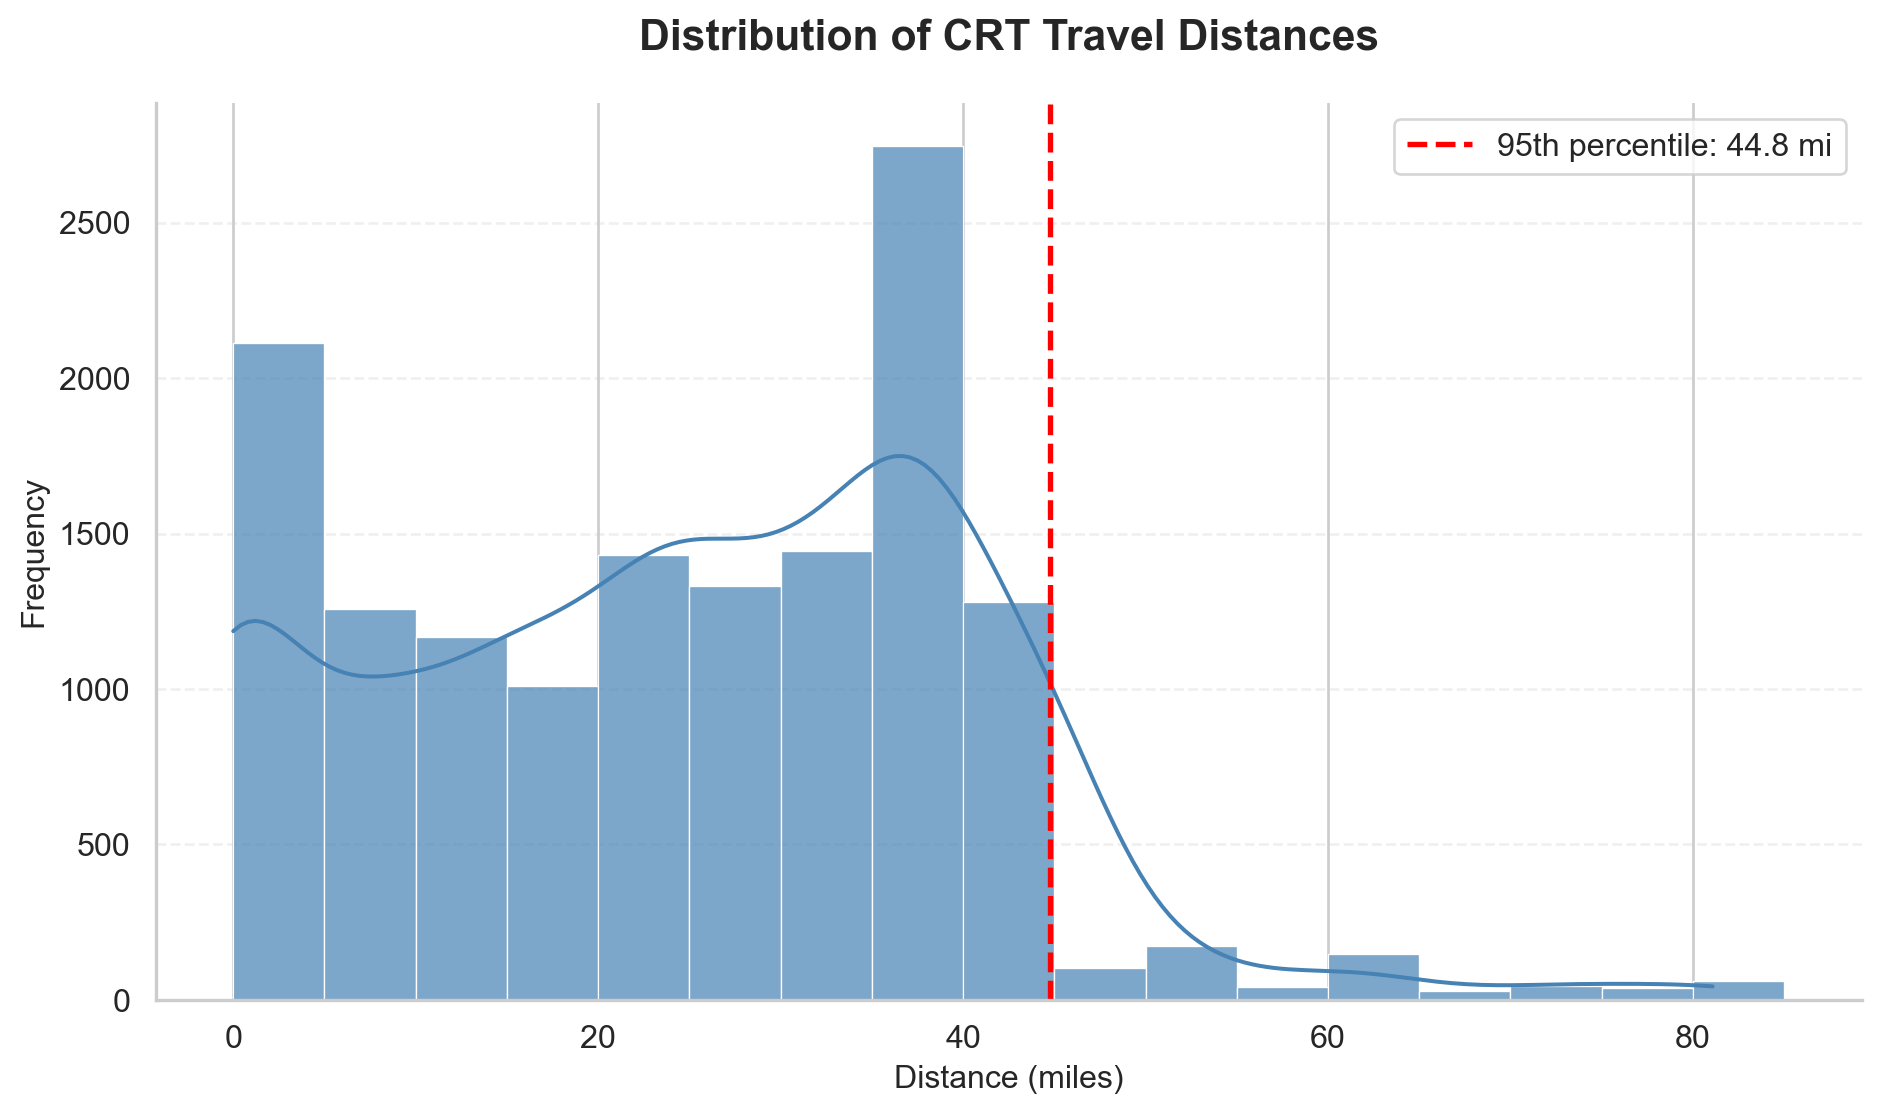

In [24]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

plt.figure(figsize=(10, 6))

# Filter relevant data
df_valid = df_obs_linked[
    (df_obs_linked['dist_CRT'].notna()) #& # filter out NaNs and
    # (df_obs_linked['dist_CRT'] > 0) # only non-zero distances
]

# Create histogram with KDE
ax = sns.histplot(
    data=df_valid,
    x='dist_CRT',
    weights="trip_weight",
    bins=(lambda x: range(0, int(df_valid['dist_CRT'].max()) + x, x))(5),
    kde=True,
    color='steelblue',
    edgecolor='white',
    linewidth=0.5,
    alpha=0.7
)

# Add 95th percentile line using sorted cumulative weights
df_sorted = df_valid.sort_values('dist_CRT')
cumsum = df_sorted['trip_weight'].cumsum()
pct95 = df_sorted.loc[cumsum >= cumsum.iloc[-1] * 0.95, 'dist_CRT'].iloc[0]

plt.axvline(pct95, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {pct95:.1f} mi')
plt.legend()

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Customize
plt.title('Distribution of CRT Travel Distances', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

In [25]:
# Create CRT distance classes using pd.cut
df_obs_linked['class_CRT'] = pd.cut(
    df_obs_linked['dist_CRT'],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf],
    labels=['CRT_00', 'CRT_01', 'CRT_02', 'CRT_03', 'CRT_04', 'CRT_05', 'CRT_06', 'CRT_07', 'CRT_08'],
    right=True,  # intervals are (a, b] - include right edge
    include_lowest=False  # exclude 0 from first bin
)

# Check the distribution
df_obs_linked['class_CRT'].value_counts().sort_index()

class_CRT
CRT_00    136
CRT_01    279
CRT_02    445
CRT_03    690
CRT_04    264
CRT_05     39
CRT_06     38
CRT_07     19
CRT_08      8
Name: count, dtype: int64

In [26]:
df_obs_linked.filter(regex='(_LAT|_LONG)$').columns

Index(['HOME_ADDRESS_LAT', 'HOME_ADDRESS_LONG', 'ORIGIN_ADDRESS_LAT',
       'ORIGIN_ADDRESS_LONG', 'DESTIN_ADDRESS_LAT', 'DESTIN_ADDRESS_LONG',
       'STOP_ON_LAT', 'STOP_ON_LONG', 'STOP_OFF_LAT', 'STOP_OFF_LONG',
       'PREV_TRAN_1_ON_BUS_LAT', 'PREV_TRAN_1_ON_BUS_LONG',
       'PREV_TRAN_1_OFF_BUS_LAT', 'PREV_TRAN_1_OFF_BUS_LONG',
       'PREV_TRAN_2_ON_BUS_LAT', 'PREV_TRAN_2_ON_BUS_LONG',
       'PREV_TRAN_2_OFF_BUS_LAT', 'PREV_TRAN_2_OFF_BUS_LONG',
       'PREV_TRAN_3_ON_BUS_LAT', 'PREV_TRAN_3_ON_BUS_LONG',
       'PREV_TRAN_3_OFF_BUS_LAT', 'PREV_TRAN_3_OFF_BUS_LONG',
       'NEXT_TRAN_1_ON_BUS_LAT', 'NEXT_TRAN_1_ON_BUS_LONG',
       'NEXT_TRAN_1_OFF_BUS_LAT', 'NEXT_TRAN_1_OFF_BUS_LONG',
       'NEXT_TRAN_2_ON_BUS_LAT', 'NEXT_TRAN_2_ON_BUS_LONG',
       'NEXT_TRAN_2_OFF_BUS_LAT', 'NEXT_TRAN_2_OFF_BUS_LONG',
       'NEXT_TRAN_3_ON_BUS_LAT', 'NEXT_TRAN_3_ON_BUS_LONG',
       'NEXT_TRAN_3_OFF_BUS_LAT', 'NEXT_TRAN_3_OFF_BUS_LONG'],
      dtype='object')

In [27]:
#| eval: false

import folium
from folium import Marker, CircleMarker, FeatureGroup, PolyLine
import pandas as pd
import numpy as np

# ============================================================================
# COLOR AND STYLE CONFIGURATION
# ============================================================================
MODE_STYLES = {
    1: {'color': '#5b80a3', 'weight': 2},   # MT (Microtransit)
    4: {'color': '#00508b', 'weight': 3},   # LCL (Local Bus) - UTA Blue
    5: {'color': '#FF6B35', 'weight': 3},   # COR (Core Bus)
    6: {'color': '#6fb74d', 'weight': 3},   # EXP (Express Bus)
    7: {'color': '#ce132d', 'weight': 4},   # LRT (Light Rail) - UTA Red
    8: {'color': '#9c4392', 'weight': 6},   # CRT (Commuter Rail) - UTA Green
    9: {'color': '#007dbb', 'weight': 5}    # BRT (Bus Rapid Transit)
}

ACCESS_EGRESS_STYLES = {
    'Walk': {'color': '#898a8d', 'weight': 2},
    'KNR': {'color': '#FFA500', 'weight': 2},
    'PNR': {'color': '#FF6B35', 'weight': 2},
    'Drive': {'color': '#FF6B35', 'weight': 2}
}

TRANSFER_WALK_STYLE = {'color': '#898a8d', 'weight': 2}
SNAP_LINE_STYLE = {'color': '#00CED1', 'weight': 2, 'dash_array': '5, 5'}  # Dashed cyan for snap connections
SURVEYED_TRIP_WEIGHT_MULTIPLIER = 1.5

# ============================================================================
# SETUP
# ============================================================================
RESPONSE_ID = 15514

df_plot = df_obs_linked[df_obs_linked["ID"] == RESPONSE_ID].iloc[0]

# Determine center
if pd.notna(df_plot['p_lat']) and pd.notna(df_plot['p_lon']):
    center_lat, center_lon = df_plot['p_lat'], df_plot['p_lon']
elif pd.notna(df_plot['a_lat']) and pd.notna(df_plot['a_lon']):
    center_lat, center_lon = df_plot['a_lat'], df_plot['a_lon']
elif pd.notna(df_plot['HOME_ADDRESS_LAT']) and pd.notna(df_plot['HOME_ADDRESS_LONG']):
    center_lat, center_lon = df_plot['HOME_ADDRESS_LAT'], df_plot['HOME_ADDRESS_LONG']
else:
    center_lat, center_lon = 40.7608, -111.8910
    print("Warning: No valid coordinates found, using default center")

m = folium.Map(location=[center_lat, center_lon], zoom_start=13, tiles='OpenStreetMap')

# Create feature groups
fg_taz = FeatureGroup(name='Relevant TAZs', show=True)
fg_all_nodes = FeatureGroup(name='All Transit Network Nodes', show=False)
fg_stops = FeatureGroup(name='Transit Stops Used', show=True)
fg_snapped_stops = FeatureGroup(name='Snapped Stop Nodes (from Network)', show=True)
fg_snap_connections = FeatureGroup(name='Snap Connections', show=True)
fg_addresses = FeatureGroup(name='Addresses', show=True)
fg_trip_lines = FeatureGroup(name='Trip Sequence', show=True)

# ============================================================================
# SHOW RELEVANT TAZs
# ============================================================================
if pd.notna(df_plot['p_TAZID']):
    p_taz = gdf_taz_v10[gdf_taz_v10['TAZID'] == df_plot['p_TAZID']]
    if len(p_taz) > 0:
        p_geojson = p_taz.to_crs('EPSG:4326').__geo_interface__
        folium.GeoJson(
            p_geojson,
            style_function=lambda x: {
                'fillColor': 'darkgreen',
                'color': 'darkgreen',
                'weight': 2,
                'fillOpacity': 0.15
            },
            tooltip=f"Production TAZ: {df_plot['p_TAZID']}"
        ).add_to(fg_taz)

if pd.notna(df_plot['a_TAZID']):
    a_taz = gdf_taz_v10[gdf_taz_v10['TAZID'] == df_plot['a_TAZID']]
    if len(a_taz) > 0:
        a_geojson = a_taz.to_crs('EPSG:4326').__geo_interface__
        folium.GeoJson(
            a_geojson,
            style_function=lambda x: {
                'fillColor': 'darkblue',
                'color': 'darkblue',
                'weight': 2,
                'fillOpacity': 0.15
            },
            tooltip=f"Attraction TAZ: {df_plot['a_TAZID']}"
        ).add_to(fg_taz)

# ============================================================================
# ADD ALL TRANSIT NETWORK NODES (BACKGROUND LAYER)
# ============================================================================
# Get unique node geometries (since same node can serve multiple modes)
unique_nodes = (
    df_stop_nodes
    .groupby('N')
    .agg(
        geometry=('geometry', 'first'),
        MODE=('MODE', lambda s: ', '.join(str(m) for m in sorted(s.dropna().unique())))
    )
    .reset_index()
)

unique_nodes_gdf = gpd.GeoDataFrame(unique_nodes, geometry='geometry', crs=df_stop_nodes.crs)
unique_nodes_gdf_wgs84 = unique_nodes_gdf.to_crs('EPSG:4326')

# Add all nodes as small gray circles
for _, node in unique_nodes_gdf_wgs84.iterrows():
    folium.CircleMarker(
        location=[node.geometry.y, node.geometry.x],
        radius=4,
        color='#444444',
        fill=True,
        fillColor='#444444',
        fillOpacity=0.75,
        weight=0.75,
        popup=f"Node: {node['N']}\nMode: {node['MODE']}",
        tooltip=f"Node {node['N']}"
    ).add_to(fg_all_nodes)

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def get_mode_name(mode_num):
    mode_names = {
        1: 'MT (Microtransit)',
        4: 'LCL (Local)',
        5: 'COR (Corridor)',
        6: 'EXP (Express)',
        7: 'LRT (Light Rail)',
        8: 'CRT (FrontRunner)',
        9: 'BRT (Rapid Transit)'
    }
    return mode_names.get(mode_num, f'Mode {mode_num}')

def get_mode_color(mode_num):
    return MODE_STYLES.get(mode_num, {}).get('color', '#666666')

def get_mode_weight(mode_num):
    return MODE_STYLES.get(mode_num, {}).get('weight', 3)

def add_line_segment(coords_list, color, weight, dash_array, label, popup_text, feature_group):
    valid_coords = []
    for coord in coords_list:
        if coord is not None and len(coord) == 2:
            lat, lon = coord
            if pd.notna(lat) and pd.notna(lon):
                valid_coords.append([lat, lon])

    if len(valid_coords) >= 2:
        folium.PolyLine(
            locations=valid_coords,
            color=color,
            weight=weight,
            opacity=0.8,
            dash_array=dash_array,
            popup=popup_text,
            tooltip=label
        ).add_to(feature_group)
        return True
    return False

def add_stop_marker(lat, lon, label, mode_num, feature_group):
    if pd.notna(lat) and pd.notna(lon):
        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            color=get_mode_color(mode_num),
            fill=True,
            fillColor=get_mode_color(mode_num),
            fillOpacity=0.9,
            popup=label,
            tooltip=label
        ).add_to(feature_group)

# ============================================================================
# BUILD TRIP SEQUENCE
# ============================================================================
is_pa = df_plot['PA_AP'] == 'PA'
trip_sequence = []

if is_pa:
    segments = [
        ('PREV_TRAN_1', 'Modefrom1', 'Transfer 1 (from origin)'),
        ('PREV_TRAN_2', 'Modefrom2', 'Transfer 2 (from origin)'),
        ('PREV_TRAN_3', 'Modefrom3', 'Transfer 3 (from origin)'),
        ('STOP', 'Mode_Fin', 'SURVEYED TRIP'),
        ('NEXT_TRAN_1', 'Modeto1', 'Transfer 1 (to destination)'),
        ('NEXT_TRAN_2', 'Modeto2', 'Transfer 2 (to destination)'),
        ('NEXT_TRAN_3', 'Modeto3', 'Transfer 3 (to destination)'),
    ]
else:
    segments = [
        ('NEXT_TRAN_3', 'Modeto3', 'Transfer 3'),
        ('NEXT_TRAN_2', 'Modeto2', 'Transfer 2'),
        ('NEXT_TRAN_1', 'Modeto1', 'Transfer 1'),
        ('STOP', 'Mode_Fin', 'SURVEYED TRIP'),
        ('PREV_TRAN_3', 'Modefrom3', 'Transfer 1'),
        ('PREV_TRAN_2', 'Modefrom2', 'Transfer 2'),
        ('PREV_TRAN_1', 'Modefrom1', 'Transfer 3'),
    ]

for prefix, mode_col, label in segments:
    if prefix == 'STOP':
        if is_pa:
            on_lat = df_plot.get('STOP_ON_LAT')
            on_lon = df_plot.get('STOP_ON_LONG')
            off_lat = df_plot.get('STOP_OFF_LAT')
            off_lon = df_plot.get('STOP_OFF_LONG')
        else:
            on_lat = df_plot.get('STOP_OFF_LAT')
            on_lon = df_plot.get('STOP_OFF_LONG')
            off_lat = df_plot.get('STOP_ON_LAT')
            off_lon = df_plot.get('STOP_ON_LONG')
    else:
        if is_pa:
            on_lat = df_plot.get(f'{prefix}_ON_BUS_LAT')
            on_lon = df_plot.get(f'{prefix}_ON_BUS_LONG')
            off_lat = df_plot.get(f'{prefix}_OFF_BUS_LAT')
            off_lon = df_plot.get(f'{prefix}_OFF_BUS_LONG')
        else:
            on_lat = df_plot.get(f'{prefix}_OFF_BUS_LAT')
            on_lon = df_plot.get(f'{prefix}_OFF_BUS_LONG')
            off_lat = df_plot.get(f'{prefix}_ON_BUS_LAT')
            off_lon = df_plot.get(f'{prefix}_ON_BUS_LONG')

    mode_num = df_plot.get(mode_col)

    if pd.notna(on_lat) and pd.notna(off_lat) and pd.notna(mode_num):
        trip_sequence.append({
            'on_lat': on_lat,
            'on_lon': on_lon,
            'off_lat': off_lat,
            'off_lon': off_lon,
            'mode_num': int(mode_num),
            'mode_name': get_mode_name(mode_num),
            'label': label,
            'is_current': prefix == 'STOP'
        })

# ============================================================================
# ADD SNAPPED NETWORK STOPS
# ============================================================================
# Get snapped stop nodes from df_stop_nodes
snapped_nodes = []

# Production Stop (Access - where trip starts from network perspective)
if pd.notna(df_plot['p_Stop_N']):
    p_stop_matches = df_stop_nodes[df_stop_nodes['N'] == df_plot['p_Stop_N']]
    if len(p_stop_matches) > 0:
        node = p_stop_matches.iloc[0]
        node_geom = node.geometry
        if df_stop_nodes.crs != 'EPSG:4326':
            node_gdf = gpd.GeoDataFrame([node], geometry='geometry', crs=df_stop_nodes.crs)
            node_geom = node_gdf.to_crs('EPSG:4326').iloc[0].geometry

        modes = p_stop_matches['MODE'].unique()
        mode_names = [get_mode_name(m) for m in modes]

        folium.Marker(
            location=[node_geom.y, node_geom.x],
            icon=folium.Icon(color='green', icon='circle', prefix='fa'),
            popup=f"Access Stop Node: {df_plot['p_Stop_N']}<br>Modes: {', '.join(mode_names)}",
            tooltip=f"Network Node {df_plot['p_Stop_N']} (Access)"
        ).add_to(fg_snapped_stops)

        snapped_nodes.append({
            'type': 'access',
            'lat': node_geom.y,
            'lon': node_geom.x,
            'node_id': df_plot['p_Stop_N']
        })

# Attraction Stop (Egress - where trip ends from network perspective)
if pd.notna(df_plot['a_Stop_N']):
    a_stop_matches = df_stop_nodes[df_stop_nodes['N'] == df_plot['a_Stop_N']]
    if len(a_stop_matches) > 0:
        node = a_stop_matches.iloc[0]
        node_geom = node.geometry
        if df_stop_nodes.crs != 'EPSG:4326':
            node_gdf = gpd.GeoDataFrame([node], geometry='geometry', crs=df_stop_nodes.crs)
            node_geom = node_gdf.to_crs('EPSG:4326').iloc[0].geometry

        modes = a_stop_matches['MODE'].unique()
        mode_names = [get_mode_name(m) for m in modes]

        folium.Marker(
            location=[node_geom.y, node_geom.x],
            icon=folium.Icon(color='blue', icon='circle', prefix='fa'),
            popup=f"Egress Stop Node: {df_plot['a_Stop_N']}<br>Modes: {', '.join(mode_names)}",
            tooltip=f"Network Node {df_plot['a_Stop_N']} (Egress)"
        ).add_to(fg_snapped_stops)

        snapped_nodes.append({
            'type': 'egress',
            'lat': node_geom.y,
            'lon': node_geom.x,
            'node_id': df_plot['a_Stop_N']
        })

# ============================================================================
# DRAW TRIP WITH SNAP CONNECTIONS
# ============================================================================

# 1. Access segment (Production Address → Snapped Access Stop)
if len(snapped_nodes) > 0 and snapped_nodes[0]['type'] == 'access':
    access_node = snapped_nodes[0]
    access_mode = df_plot['Ac_Mode3_Model']
    access_style = ACCESS_EGRESS_STYLES.get(access_mode, {'color': '#666666', 'weight': 3})

    add_line_segment(
        [[df_plot['p_lat'], df_plot['p_lon']],
         [access_node['lat'], access_node['lon']]],
        color=access_style['color'],
        weight=access_style['weight'],
        dash_array='8, 4',
        label=f'Access: {access_mode}',
        popup_text=f"Access: {access_mode}<br>To Network Node: {access_node['node_id']}<br>Distance: {df_plot.get('access_dist', 'N/A'):.2f} mi",
        feature_group=fg_trip_lines
    )

    # Snap connection (Access Node → First Transit Stop)
    if len(trip_sequence) > 0:
        first_stop = trip_sequence[0]
        add_line_segment(
            [[access_node['lat'], access_node['lon']],
             [first_stop['on_lat'], first_stop['on_lon']]],
            color=SNAP_LINE_STYLE['color'],
            weight=SNAP_LINE_STYLE['weight'],
            dash_array=SNAP_LINE_STYLE['dash_array'],
            label='Access Snap Connection',
            popup_text=f"Connection: Network Node → Surveyed Stop",
            feature_group=fg_snap_connections
        )

# 2. Transit segments and transfers
for i, segment in enumerate(trip_sequence):
    add_stop_marker(
        segment['on_lat'],
        segment['on_lon'],
        f"Board: {segment['label']}<br>{segment['mode_name']}",
        segment['mode_num'],
        fg_stops
    )

    base_weight = get_mode_weight(segment['mode_num'])
    weight = int(base_weight * SURVEYED_TRIP_WEIGHT_MULTIPLIER) if segment['is_current'] else base_weight

    add_line_segment(
        [[segment['on_lat'], segment['on_lon']],
         [segment['off_lat'], segment['off_lon']]],
        color=get_mode_color(segment['mode_num']),
        weight=weight,
        dash_array=None,
        label=f"{segment['label']}: {segment['mode_name']}",
        popup_text=f"{segment['label']}<br>{segment['mode_name']}" +
                   ("<br><b>★ SURVEYED TRIP ★</b>" if segment['is_current'] else ""),
        feature_group=fg_trip_lines
    )

    add_stop_marker(
        segment['off_lat'],
        segment['off_lon'],
        f"Alight: {segment['label']}<br>{segment['mode_name']}",
        segment['mode_num'],
        fg_stops
    )

    if i < len(trip_sequence) - 1:
        next_segment = trip_sequence[i + 1]
        add_line_segment(
            [[segment['off_lat'], segment['off_lon']],
             [next_segment['on_lat'], next_segment['on_lon']]],
            color=TRANSFER_WALK_STYLE['color'],
            weight=TRANSFER_WALK_STYLE['weight'],
            dash_array='2, 6',
            label='Transfer Walk',
            popup_text='Walking between stops',
            feature_group=fg_trip_lines
        )

# 3. Egress segment (Last Transit Stop → Snapped Egress Stop → Attraction Address)
if len(trip_sequence) > 0:
    last_stop = trip_sequence[-1]
    egress_mode = df_plot['Eg_Mode3_Model']
    egress_style = ACCESS_EGRESS_STYLES.get(egress_mode, {'color': '#666666', 'weight': 3})

    # Find egress node
    egress_node = next((n for n in snapped_nodes if n['type'] == 'egress'), None)

    if egress_node:
        # Snap connection (Last Transit Stop → Egress Node)
        add_line_segment(
            [[last_stop['off_lat'], last_stop['off_lon']],
             [egress_node['lat'], egress_node['lon']]],
            color=SNAP_LINE_STYLE['color'],
            weight=SNAP_LINE_STYLE['weight'],
            dash_array=SNAP_LINE_STYLE['dash_array'],
            label='Egress Snap Connection',
            popup_text=f"Connection: Surveyed Stop → Network Node",
            feature_group=fg_snap_connections
        )

        # Egress walk (Egress Node → Attraction Address)
        add_line_segment(
            [[egress_node['lat'], egress_node['lon']],
             [df_plot['a_lat'], df_plot['a_lon']]],
            color=egress_style['color'],
            weight=egress_style['weight'],
            dash_array='8, 4',
            label=f'Egress: {egress_mode}',
            popup_text=f"Egress: {egress_mode}<br>From Network Node: {egress_node['node_id']}<br>Distance: {df_plot.get('egress_dist', 'N/A'):.2f} mi",
            feature_group=fg_trip_lines
        )

# ============================================================================
# ADD ADDRESS MARKERS
# ============================================================================
if pd.notna(df_plot['HOME_ADDRESS_LAT']) and pd.notna(df_plot['HOME_ADDRESS_LONG']):
    folium.Marker(
        location=[df_plot['HOME_ADDRESS_LAT'], df_plot['HOME_ADDRESS_LONG']],
        icon=folium.Icon(color='red', icon='home', prefix='fa'),
        popup='Home Address',
        tooltip='Home'
    ).add_to(fg_addresses)

if pd.notna(df_plot['p_lat']) and pd.notna(df_plot['p_lon']):
    folium.Marker(
        location=[df_plot['p_lat'], df_plot['p_lon']],
        icon=folium.Icon(color='darkgreen', icon='play', prefix='fa'),
        popup=f"Production Address<br>TAZ: {df_plot['p_TAZID']}<br>Purpose: {df_plot['Purp5_text']}",
        tooltip='Production (Trip Start)'
    ).add_to(fg_addresses)

if pd.notna(df_plot['a_lat']) and pd.notna(df_plot['a_lon']):
    folium.Marker(
        location=[df_plot['a_lat'], df_plot['a_lon']],
        icon=folium.Icon(color='darkblue', icon='stop', prefix='fa'),
        popup=f"Attraction Address<br>TAZ: {df_plot['a_TAZID']}<br>Purpose: {df_plot['Purp5_text']}",
        tooltip='Attraction (Trip End)'
    ).add_to(fg_addresses)

# ============================================================================
# ADD LAYERS
# ============================================================================
fg_taz.add_to(m)
fg_all_nodes.add_to(m)  # Add all network nodes layer
fg_trip_lines.add_to(m)
fg_snap_connections.add_to(m)
fg_stops.add_to(m)
fg_snapped_stops.add_to(m)  # Snapped nodes on top
fg_addresses.add_to(m)

folium.LayerControl(collapsed=False).add_to(m)

# ============================================================================
# ADD TRIP SUMMARY
# ============================================================================
mode_sequence_html = ""
for i, seg in enumerate(trip_sequence, 1):
    color = get_mode_color(seg['mode_num'])
    star = " ★" if seg['is_current'] else ""
    mode_sequence_html += f'{i}. <span style="color:{color}">●</span> {seg["mode_name"]}{star}<br>'

trip_summary = f"""
<div style="position: fixed;
     top: 10px; left: 60px; width: 340px;
     background-color: white; border:2px solid grey; z-index:9999;
     font-size:13px; padding: 10px; font-family: Arial, sans-serif;">
<b style="font-size: 15px;">Trip ID: {df_plot['ID']}</b><br>
<hr style="margin: 5px 0;">
<b>Trip Details:</b><br>
Direction: {df_plot['PA_AP']} (P → A)<br>
Purpose: {df_plot['Purp5_text']}<br>
Period: {df_plot['Period']}<br>
Linked Mode: {df_plot['Linked_Mode_txt']}<br>
Total Transfers: {df_plot['Total_Xfer']}<br>
<hr style="margin: 5px 0;">
<b>Access/Egress:</b><br>
Access: {df_plot['Ac_Mode3_Model']} ({df_plot.get('access_dist', 'N/A'):.2f} mi)<br>
Egress: {df_plot['Eg_Mode3_Model']} ({df_plot.get('egress_dist', 'N/A'):.2f} mi)<br>
<hr style="margin: 5px 0;">
<b>Transit Sequence:</b><br>
{mode_sequence_html}
<hr style="margin: 5px 0;">
<small>
<span style="color:{SNAP_LINE_STYLE['color']}">- - -</span> = Network snap connection<br>
<span style="color:{TRANSFER_WALK_STYLE['color']}">⋯⋯</span> = Transfer walk<br>
<span style="color:#898a8d">▬ ▬</span> = Access/Egress walk
</small>
</div>
"""
m.get_root().html.add_child(folium.Element(trip_summary))

m

In [28]:
# Create output directory if it doesn't exist
output_dir = Path("_output")
output_dir.mkdir(parents=True, exist_ok=True)

# Export to CSV
df_obs_linked.to_csv(
    output_dir / "UTA_OBS_2024_Linked_FactorAdjusted_CRT.csv",
    index=False
)

print(f"Exported {len(df_obs_linked)} records")

Exported 12020 records
